In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('california_housing_train_reduced.csv')

print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [15]:
df.corr()['total_rooms'] # finding the correlation of total_bedrooms with the other factors
# Correlation is a statistical measure that describes the strength and direction of a relationship between two variables. It ranges from -1 to 1:

# +1 indicates a perfect positive correlation: as one variable increases, the other also increases proportionally.
# -1 indicates a perfect negative correlation: as one variable increases, the other decreases proportionally.
# 0 indicates no correlation: there’s no relationship between the variables.

longitude             0.047010
latitude             -0.038773
housing_median_age   -0.360984
total_rooms           1.000000
total_bedrooms        0.928403
population            0.860170
households            0.919018
median_income         0.195383
median_house_value    0.130991
Name: total_rooms, dtype: float64

In [16]:
bedrooms = df['total_bedrooms']
df = df.drop(['total_bedrooms', 'longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value'], axis=1) # keeping the ones with a strong correlation
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


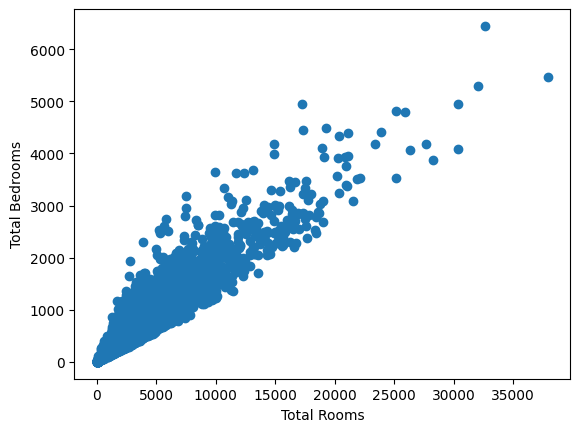

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'], df['bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

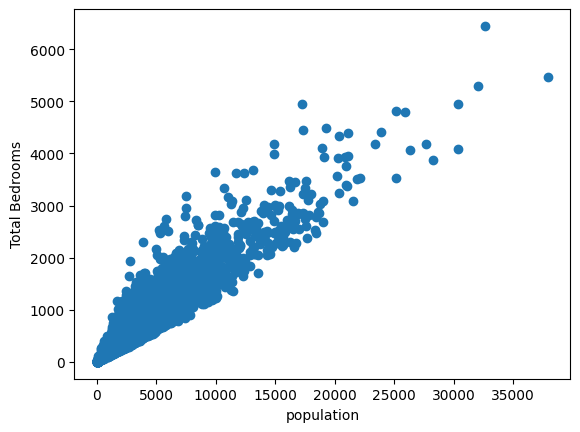

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'], df['bedrooms'])
plt.xlabel('population')
plt.ylabel('Total Bedrooms')
plt.show()

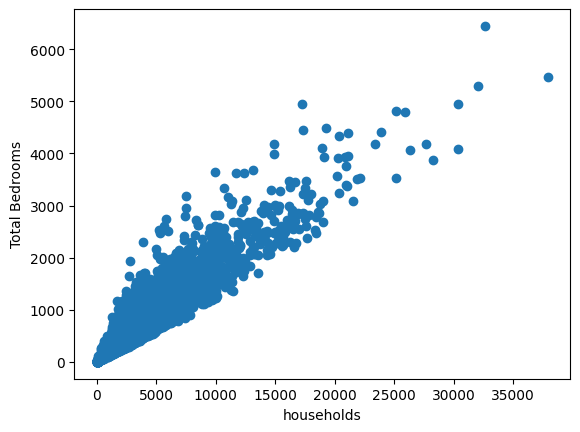

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'], df['bedrooms'])
plt.xlabel('households')
plt.ylabel('Total Bedrooms')
plt.show()

In [20]:
df_np = df.to_numpy()
df_np.shape

# In this code, the method .to_numpy() is used to convert a DataFrame (df) into a NumPy array, and then .shape is used to get the dimensions of that array.

# Explanation
# df.to_numpy() converts the DataFrame df into a NumPy array. This can be useful for numerical operations that are easier to perform with NumPy than with a DataFrame.
# df_np.shape returns the shape of the df_np array. The shape is given as a tuple with the format (rows, columns), indicating the number of rows and columns in the array.

(17000, 4)

In [21]:
X_train, y_train = df_np[:, :3], df_np[:, -1]
X_train.shape, y_train.shape

# Slicing:

# df_np[:, :3]: This selects all rows (:) and the first three columns (:3) of df_np for X_train.
# df_np[:, -1]: This selects all rows (:) and only the last column (-1) of df_np for y_train.
# Assignment:

# X_train = df_np[:, :3]: This assigns the first three columns of df_np (all rows) to X_train. These columns are typically used as the feature variables for training.
# y_train = df_np[:, -1]: This assigns the last column of df_np (all rows) to y_train, which is typically the target variable for training.
# Shape Output:

# X_train.shape: Returns the shape of X_train, giving a tuple with (number of rows, number of columns in X_train).
# y_train.shape: Returns the shape of y_train, which would be (number of rows,) since it contains a single column.

((17000, 3), (17000,))

In [22]:
X_train

array([[5612., 1015.,  472.],
       [7650., 1129.,  463.],
       [ 720.,  333.,  117.],
       ...,
       [2677., 1244.,  456.],
       [2672., 1298.,  478.],
       [1820.,  806.,  270.]])

In [25]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train) # takes the input and output array for training
sklearn_y_predictions = sklearn_model.predict(X_train) # uses model to make prediction on features of X_train
sklearn_y_predictions.shape
sklearn_y_predictions

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ])

In [31]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

mean_absolute_error(sklearn_y_predictions, y_train), root_mean_squared_error(sklearn_y_predictions, y_train) # finding the error between the training set and the predicted set
# print("Mean of y_train:", np.mean(y_train))
# print("Standard deviation of y_train:", np.std(y_train))

(np.float64(39.67221765070663), np.float64(75.17068459291747))

In [32]:
predictions_df = pd.DataFrame({'Population': df['population'],
                               'Households': df['households'],
                               'Total Rooms': df['total_rooms'],
                               'Bedrooms': df['bedrooms'],
                               'Sklearn Bedroom Predictions':sklearn_y_predictions})
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562
2,333.0,117.0,720.0,174.0,130.849378
3,515.0,226.0,1501.0,337.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311
...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603


In [ ]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

mean_absolute_error(sklearn_y_predictions, y_train), root_mean_squared_error(sklearn_y_predictions, y_train) # finding the error between the training set and the predicted set
# print("Mean of y_train:", np.mean(y_train))
# print("Standard deviation of y_train:", np.std(y_train))

(np.float64(39.67221765070663), np.float64(75.17068459291747))

In [34]:
# Assuming total_bedrooms[i] = alpha + (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total_rooms[i]) + error
# Generally: y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

def get_predictions(model, X):
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''

  (n, p_minus_one) = X.shape # this is because the parameters include alpha which is not in the x matrix
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p)) # creating a matrix of ones with n columns and p rows
  new_X[:, 1:] = X # overidung everything apart fro the first column to be the values of X

  return np.dot(new_X, model) # dot multiplication of the new_x and the model 

In [ ]:
test_model = np.array([1, 1/4, 1/3, 1.2]) # 1 = alpha, 1/4 = beta_1, 1/3 = beta_2, 1.2 = beta_3
get_predictions(test_model, X_train).shape

(17000,)

In [ ]:
predictions_df['Test Predictions'] = get_predictions(test_model, X_train)
predictions_df # creating a data frame which includes the original data set and the prediccted

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions,Test Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,2308.733333
1,1129.0,463.0,7650.0,1901.0,693.119562,2845.433333
2,333.0,117.0,720.0,174.0,130.849378,432.400000
3,515.0,226.0,1501.0,337.0,259.462982,819.116667
4,624.0,262.0,1454.0,326.0,289.315311,886.900000
...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,1300.383333
16996,1194.0,465.0,2349.0,528.0,501.086730,1544.250000
16997,1244.0,456.0,2677.0,531.0,502.561260,1632.116667
16998,1298.0,478.0,2672.0,552.0,522.072603,1675.266667


In [37]:
mean_absolute_error(predictions_df['Test Predictions'], y_train)

np.float64(1200.4964323529412)

In [38]:
# minimizing the error  using the "Normal Equation" approach
# The Normal Equation gives the parameter values that minimize the squared differences between the predicted and actual values in one calculation. It's efficient when the number of features 
# 𝑝
# p is relatively small.
from numpy.linalg import inv #  importing the inverse

def get_best_model(X, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)

In [39]:
best_model = get_best_model(X_train, y_train)
predictions_df['Best Predictions'] = get_predictions(best_model, X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions,Test Predictions,Best Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,2308.733333,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562,2845.433333,693.119562
2,333.0,117.0,720.0,174.0,130.849378,432.400000,130.849378
3,515.0,226.0,1501.0,337.0,259.462982,819.116667,259.462982
4,624.0,262.0,1454.0,326.0,289.315311,886.900000,289.315311
...,...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,1300.383333,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730,1544.250000,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260,1632.116667,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603,1675.266667,522.072603


In [41]:
mean_absolute_error(predictions_df['Best Predictions'], y_train), root_mean_squared_error(predictions_df['Best Predictions'], y_train)

(np.float64(39.67221765070596), np.float64(75.17068459291747))